# CS145 Howework 4


<span style="color:red"> **Important Note:** </span>
HW4 is due on **11:59 PM PT, Nov 20 (Friday, Week 7)**. Please submit through GradeScope. 

## Print Out Your Name and UID

<span style="color:blue"> **Name: Rui Deng, UID: 205123245** </span>

## Before You Start

You need to first create HW4 conda environment by the given `cs145hw4.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw4.yml
conda activate hw4
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw4.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks (such as some important hyperparameters) that you are allowed to edit (between STRART/END YOUR CODE HERE), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

In [10]:
import numpy as np 
import pandas as pd
import sys 
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


If you can successfully run the code above, there will be no problem for environment setting.

## 1. Clustering Evaluation
This workbook will walk you through an example for calculating different clustering metrics. 

<span style="color:red"> Note: This is a "question-answer" style problem. You do not need to code anything and you are required to calculate by hand (with a scientific calculator). </span>

**Questions**


Suppose we want to cluster the following 20 conferences into four areas, with ground truth label and algorithm output label shown in third and fourth column. Please evaluate the quality of the clustering algorithm according to four different metrics respectively.<img src="conferences.png"  width="600"/>


**Questions (please include intermediate steps)**



1. Calculate purity.
2. Calculate precision.
3. Calculate recall.
4. Calculate F1-score.
5. Calculate normalized mutual information.

**Your answer here:**


<span style="color:red"> Note: you can use several code cells to help you compute the results and answer the questions. Again you don't need to do any coding. </span>

<span style="color:blue"> Please type your answer here! </span>

answer 1

We assign algorithm output label 1 to ground truth label 2, and all of the 5 datapoints are matched.

We assign algorithm output label 2 to ground truth label 3, and 5 out of the 6 datapoints are matched. (the non-matched datapoint has ground truth label 1)

We assign algorithm output label 3 to ground truth label 1, and 4 out of the 5 datapoints are matched. (the non-matched datapoint has ground truth label 4)

We assign algorithm output label 4 to ground truth label 4, and 4 out of the 4 datapoints are matched.

So the purity is:

$$ purity = \frac {1} {N} \sum_k {max |c_k \cap \omega_j|} = \frac {1} {20} * (5 + 5 + 4 + 4) = 0.9 $$


answer 2

Precision is  $ \frac {TP} {TP + FP} $. Then we use coding to calculate TP, FP, TN, and FN:

In [4]:
ground_truth = [3, 3, 1, 1, 1, 4, 3, 3, 4, 2, 4, 2, 1, 2, 3, 2, 1, 2, 4, 4]
output_label = [2, 2, 3, 3, 3, 4, 2, 2, 3, 1, 4, 1, 3, 1, 2, 1, 2, 1, 4, 4]
TP = 0.0
FP = 0.0
TN = 0.0
FN = 0.0
for i in range(len(ground_truth)):
    for j in range(i + 1, len(ground_truth)):
        g = ground_truth[i]
        l = output_label[j]
        if output_label[i] == output_label[j]:
            if ground_truth[i] == ground_truth[j]:
                TP += 1
            else:
                FP += 1
        else:
            if ground_truth[i] == ground_truth[j]:
                FN += 1
            else:
                TN += 1
precision = TP / (TP + FP)
print(precision) 

0.7804878048780488


So the precision is 0.78.

answer 3

Recall is $\frac {TP} {TP + FN}$. Using the previous code, we have:

In [5]:
recall = TP / (TP + FN)
print(recall)

0.8


So the recall is 0.8.

answer 4

F1-score is $\frac {2 * Precision * Recall} {Precision + Recall}$. Using the previous code, we have:

In [6]:
print(2 * precision * recall / (precision + recall))

0.7901234567901235


So the F-1 score is 0.79.

answer 5

We use coding to generate normalized mutual information:

In [13]:
from collections import Counter
import math

N = 20.0
dic_output = Counter(output_label)
dic_truth = Counter(ground_truth)
H_O = 0.0
H_T = 0.0
for i in range(1, 5):
    H_O -= dic_output[i] / N * math.log(dic_output[i] / N, 2)
    H_T -= dic_truth[i] / N * math.log(dic_truth[i] / N, 2)
I = 0.0
I += 5 / N * math.log(N * 5 / (dic_output[1] * dic_truth[2]), 2)
I += 5 / N * math.log(N * 5 / (dic_output[2] * dic_truth[3]), 2) + 1 / N * math.log(N * 1 / (dic_output[2] * dic_truth[1]), 2)
I += 4 / N * math.log(N * 4 / (dic_output[3] * dic_truth[1]), 2) + 1 / N * math.log(N * 1 / (dic_output[3] * dic_truth[4]), 2)
I += 4 / N * math.log(N * 4 / (dic_output[4] * dic_truth[4]), 2)
print(I / (H_O * H_T) ** (1 / 2))

0.8152212305376372


So the NMI is 0.8152.

## 2. K-means

In this section, we are going to apply K-means algorithm against two datasets (dataset1.txt, dataset2.txt) with different distributions, respectively. 


For each dataset, it contains 3 columns, with the format: x1 \t x2 \t cluster_label. You need to use the first two columns for clustering, and the last column for evaluation.


In [14]:
from hw4code.KMeans import KMeans
k = KMeans()
# As a sanity check, we print out a sample of each dataset
dataname1 = "data/dataset1.txt"
dataname2 = "data/dataset2.txt"
k.check_dataloader(dataname1)
k.check_dataloader(dataname2)


For dataset1: number of datapoints is 150
          x         y  ground_truth_cluster
0 -0.163880 -0.219869                     1
1 -0.886274 -0.356186                     1
2 -0.978910 -0.893314                     1
3 -0.658867 -0.371122                     1
4 -0.072518  0.399157                     1

For dataset2: number of datapoints is 200
          x         y  ground_truth_cluster
0  1.068587  0.136921                     1
1  0.705440  0.393068                     1
2  0.840811 -0.054906                     1
3 -0.923447  0.598501                     1
4  0.784353  0.724743                     1


### 2.1 Coding K-means

Complete the `reassignClusters` and `getCentroid` function in `KMeans.py`. 

Print out each output cluster's size and centroid（x,y) for dataset1 and dataset2 respectively.

In [17]:
k = KMeans()
#========================#
# STRART YOUR CODE HERE  #
#========================#
k.main("data/dataset1.txt")
k.main("data/dataset2.txt")
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Iteration :4
Cluster 0 size :50
Centroid [x=2.5737264423871213, y=-0.027462568841232993]
Cluster 1 size :50
Centroid [x=-0.4633368646347212, y=-0.46611409698195794]
Cluster 2 size :50
Centroid [x=0.9888766205736857, y=2.010478965197201]

For dataset2
Iteration :3
Cluster 0 size :102
Centroid [x=1.2708406269481844, y=-0.08583389704900128]
Cluster 1 size :98
Centroid [x=-0.2018593506236788, y=0.5726963240559535]


### 2.2 Purity and NMI Evaluation

Complete the `compute_purity` function in `KMeans.py`. 

In order to compute NMI, you need to firstly compute NMI matrix and then do the calculation. That is to complete the `getNMIMatrix` and `calcNMI` functions in `KMeans.py`.

Print out the purity and NMI for each dataset respectively.

In [24]:
k = KMeans()
#========================#
# STRART YOUR CODE HERE  #
#========================#
k.main("data/dataset1.txt", isevaluate=True)
k.main("data/dataset2.txt", isevaluate=True)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Iteration :4
Purity is 1.000000
NMI is 1.000000
Cluster 0 size :50
Centroid [x=2.5737264423871213, y=-0.027462568841232993]
Cluster 1 size :50
Centroid [x=-0.4633368646347212, y=-0.46611409698195794]
Cluster 2 size :50
Centroid [x=0.9888766205736857, y=2.010478965197201]

For dataset2
Iteration :3
Purity is 0.760000
NMI is 0.205096
Cluster 0 size :102
Centroid [x=1.2708406269481844, y=-0.08583389704900128]
Cluster 1 size :98
Centroid [x=-0.2018593506236788, y=0.5726963240559535]


### 2.3 Visualization

The clustering results for KMeans are saved as `KMeans_dataset1.csv` and `KMeans_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

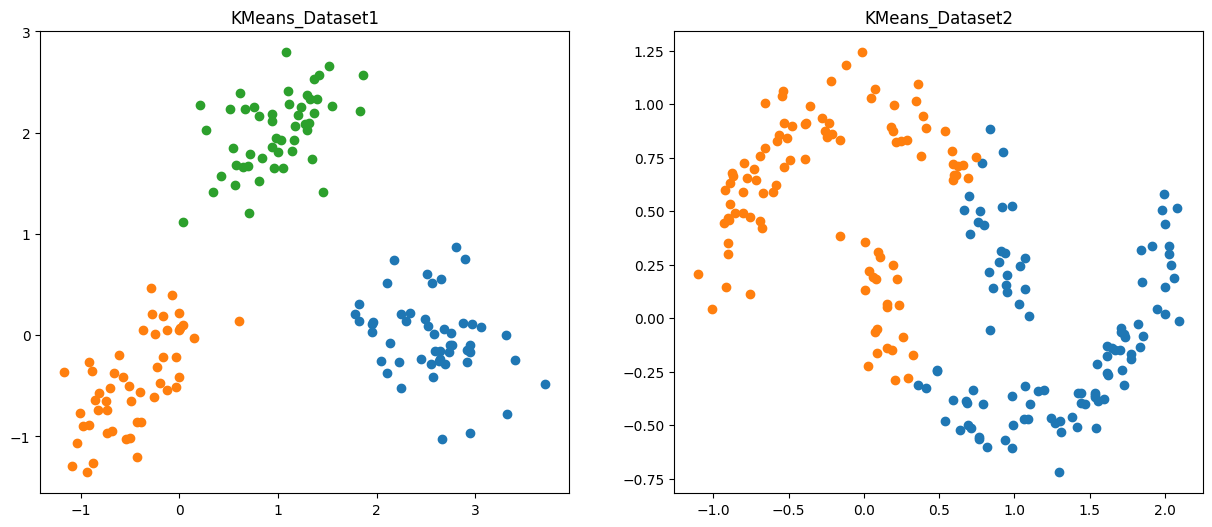

In [11]:
CSV_FILE_PATH1 = 'Kmeans_dataset1.csv'
CSV_FILE_PATH2 = 'Kmeans_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("KMeans_Dataset1")
ax1.title.set_text("KMeans_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#
def create_plot(df, ax):
    df_0 = df.loc[df.iloc[:, 2]==0]
    df_1 = df.loc[df.iloc[:, 2]==1]
    df_2 = df.loc[df.iloc[:, 2]==2]
    df_3 = df.loc[df.iloc[:, 2]==3]
    ax.scatter(df_0.iloc[:, 0], df_0.iloc[:, 1])
    ax.scatter(df_1.iloc[:, 0], df_1.iloc[:, 1])
    ax.scatter(df_2.iloc[:, 0], df_2.iloc[:, 1])
    ax.scatter(df_3.iloc[:, 0], df_3.iloc[:, 1])

create_plot(df1, ax0)
create_plot(df2, ax1)

#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    

**Question** 


Give the pros and cons of K-means algorithm. (At least one for pro and two for cons to get full marks)


**Your answer here**


<span style="color:blue"> Please type your answer here! </span>

Pros:

This algorithm is very efficient, and its complexity is linear in n (number of datapoints). Specifically, it has O(ktn), where k is number of clusters and t is the number of iterations, and k, t << n.

Cons:

1.
This algorithm is not suitable to discover clusters with non-convex shape; for example, in dataset2, k-Means cannot efficiently classify the two curved clusters.

2.
Since we use the mean as center, this algorithm is sensitive to outliers and noisy data. 

3.
The algorithm requires us to set k (number of clusters) at first.

## 3 DBSCAN

In this section, we are going to use DBSCAN for clustering the same two datasets. 



### 3.1 Coding DBSCAN

In [1]:
import csv

txt_file = "data/dataset1.txt"
csv_file = "data/dataset1.csv"

# Read data from the TXT file
with open(txt_file, 'r') as file:
    data = file.readlines()

# Process the data and convert it to a list of lists
dataset = [line.strip().split() for line in data]

# Write the data to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dataset)

print("Dataset transferred successfully from TXT to CSV!")


Dataset transferred successfully from TXT to CSV!


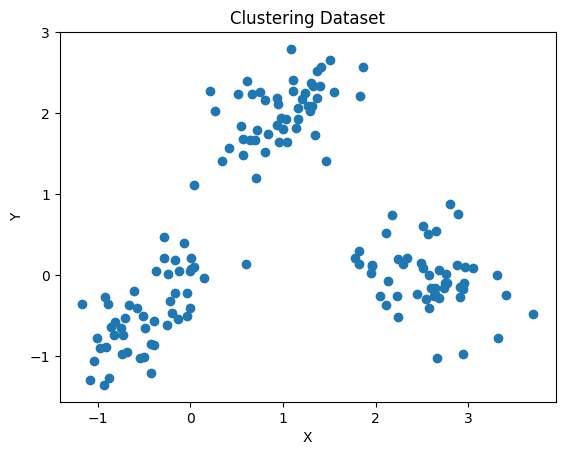

In [2]:
import matplotlib.pyplot as plt

csv_file = "data/dataset1.csv"

# Read data from the CSV file
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    dataset = list(reader)

# Extract x and y coordinates from the dataset
x = [float(row[0]) for row in dataset]
y = [float(row[1]) for row in dataset]

# Create a scatter plot
plt.scatter(x, y)
plt.title("Clustering Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Complete the `dbscan` function in `DBSCAN.py`. Print out the purity, NMI and cluter size for each dataset respectively.

In [3]:
from hw4code.DBSCAN import DBSCAN
d = DBSCAN()
#========================#
# STRART YOUR CODE HERE  #
#========================#
d.main("data/dataset1.txt")
d.main("data/dataset2.txt")
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Esp :0.3560832705047313
Number of clusters formed :4
Noise points :11
Noise:  {<hw4code.DataPoints.DataPoints object at 0x11ec7ae20>, <hw4code.DataPoints.DataPoints object at 0x11ec79d60>, <hw4code.DataPoints.DataPoints object at 0x11ec7a340>, <hw4code.DataPoints.DataPoints object at 0x11ec7a0a0>, <hw4code.DataPoints.DataPoints object at 0x11ec79040>, <hw4code.DataPoints.DataPoints object at 0x11ec7ad00>, <hw4code.DataPoints.DataPoints object at 0x11ec7a280>, <hw4code.DataPoints.DataPoints object at 0x11ec79940>, <hw4code.DataPoints.DataPoints object at 0x11ec79fa0>, <hw4code.DataPoints.DataPoints object at 0x11ec748e0>, <hw4code.DataPoints.DataPoints object at 0x11ec7a100>}
Clusters [{<hw4code.DataPoints.DataPoints object at 0x11ec74160>, <hw4code.DataPoints.DataPoints object at 0x11ec741c0>, <hw4code.DataPoints.DataPoints object at 0x11ec74700>, <hw4code.DataPoints.DataPoints object at 0x11ec743a0>, <hw4code.DataPoints.DataPoints object at 0x11ec74940>, <hw4code.DataPoi

### 3.2 Visualization

The clustering results for DBSCAN are saved as `DBSCAN_dataset1.csv` and `DBSCAN_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

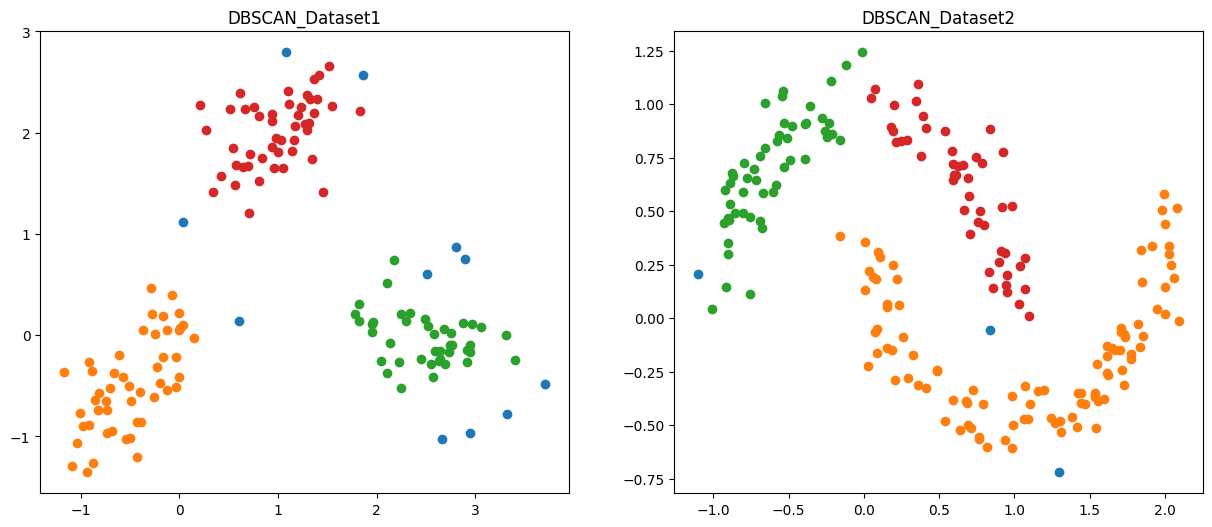

In [12]:
CSV_FILE_PATH1 = 'DBSCAN_dataset1.csv'
CSV_FILE_PATH2 = 'DBSCAN_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("DBSCAN_Dataset1")
ax1.title.set_text("DBSCAN_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#
create_plot(df1, ax0)
create_plot(df2, ax1)
#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()

In [ ]:
import 

In [13]:
data = pd.read_csv(CSV_FILE_PATH1 )

# Extract the coordinates and cluster labels
X = data.iloc[:, :2]  # Extract the first two columns as coordinates
labels = data.iloc[:, 2]  



**Question** 


Give the pros and cons of DBSCAN algorithm. (At least two for pro and one for cons to get full marks)


**Your answer here**


<span style="color:blue"> Please type your answer here! </span>

Pros:

1.
It can efficiently detect and identify the noise/outliers in data, so the algorithm is robust to noises.

2.
It can discover non-convex or even arbitrary shape in clusters, as displayed in the classification result of dataset2.

Cons:

This algorithm fails if clusters have varying density, since we have to set the minPoints as a hyperparameter before the algorithm starts.

## 4 GMM

In this section, we are going to use GMM for clustering the same two datasets. 



### 4.1 Coding GMM

Complete the `Estep` and 'Mstep' function in `GMM.py`. Print out the purity, NMI, final mean, covariance and cluter size for each dataset respectively.

In [47]:
from hw4code.GMM import GMM
g = GMM()
#========================#
# STRART YOUR CODE HERE  #
#========================#
g.main("data/dataset1.txt")
g.main("data/dataset2.txt")
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Number of Iterations = 22

After Calculations
Final mean = 
-0.46247285694404044 
-0.4638749980764899 

0.9898929396029765 
2.011802723814242 

2.57342634413319 
-0.027108746076609493 


Final covariance = 
For Cluster : 1
0.14918910487220216 
0.1173463005433889 

0.1173463005433889 
0.21554861253107502 


For Cluster : 2
0.16028233507625483 
0.07486967581052754 

0.07486967581052754 
0.13939774162738802 


For Cluster : 3
0.18039223672749394 
-0.04672614559811056 

-0.04672614559811056 
0.15206459963738583 


Purity is 1.000000
NMI is 1.000000
Cluster 0 size :50
Cluster 1 size :50
Cluster 2 size :50

For dataset2
Number of Iterations = 95

After Calculations
Final mean = 
0.7464905663922623 
0.4564966584854107 

0.28287851889390975 
-0.05970560727188754 


Final covariance = 
For Cluster : 1
0.769279076535834 
-0.28782809642382134 

-0.28782809642382134 
0.1901249384356509 


For Cluster : 2
0.6828574757628691 
-0.300589159943905 

-0.300589159943905 
0.17583559485120043

### 4.2 Visualization

The clustering results for GMM are saved as `GMM_dataset1.csv` and `GMM_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

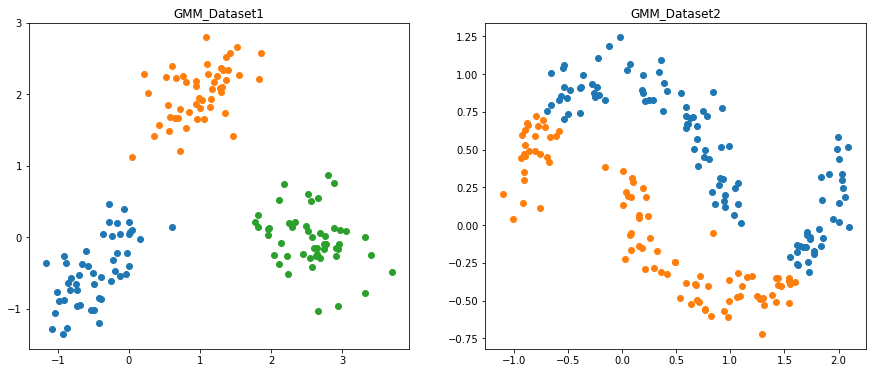

In [48]:
CSV_FILE_PATH1 = 'GMM_dataset1.csv'
CSV_FILE_PATH2 = 'GMM_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("GMM_Dataset1")
ax1.title.set_text("GMM_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#
create_plot(df1, ax0)
create_plot(df2, ax1)
#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    
    
    


**Questions**



1. Give the pros and cons of GMM algorithm. (At least two for pro and two for cons to get full marks)
2. Compare the visualization results from three algorithms, analyze for each dataset why these algorithms would produce such result.

**Your answer here:**


<span style="color:blue"> Please type your answer here! </span>

Pros of GMM:

1.
GMM can efficiently classify clusters with different sizes and density

2.
GMM do not require us the set k (number of clusters) before the algorithm starts.

3.
GMM is a generative model; that is to say, we can generate any new datapoint given its cluster distribution.

Cons of GMM:

1.
It is not suitable for clusters with non-convex shape, such as dataset2.

2.
It has high computational cost if the dimensions of datapoints and the number of datapoints are high.

Reasoning over dataset1:

We can see that both k-Means and GMM have the perfect purity and NMI classification result. For k-Means, we set the correct k (i.e. number of clusters) initially; for GMM, we run the algorithm long-enough for it to converge. Under such conditions, both algorithms can successfully detect the convex shaped cluster in dataset1.

However, for DBSCAN, it only has a purity of 0.94 and NMI of 0.959. This is because that for the left-most cluster, it is more sparsely distributed comparing to others. DBSCAN is less efficient when classifying clusters with different density, so it classifies points at the margin of the left-most cluster as outliers, and thus results in a lower purity.

Reasoning over dataset2:

This dataset has a non-convex shape. As indicated previously, k-Means and GMM are not suitable for non-convex cluster classification. As a result, k-Means has a purity of 0.76 and NMI of 0.205; GMM only has a purity of 0.69 and NMI of 0.1074.

On the contrary, DBSCAN can efficiently detect clusters with non-convex shape. So in this case, it has purity of 0.985 and NMI of 0.817. Moreover, different from dataset1, these two non-convex clusters has similar densities, so DBSCAN only classifies 3 marginal points as outliers and has higher accuracy.

## 5 Bonus Question

Prove that KMeans algorithm would guarantee covergence. (**Hint: prove for each step the loss would descrease.**)

<span style="color:blue"> Please type your answer here! </span>

# End of Homework 4 :)
After you've finished the homework, please print out the entire `ipynb` notebook and four `py` files into one PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. Also this time remember assign the pages to the questions on GradeScope